# Modelagem do Buck

Considerando $\mu = 1$ como a chave ligada e $\mu = 0$ como a chave desligada, a topologia _buck_ pode ser descria pelas seguintes equações diferenciais de primeira ordem:

$$
    Lo\,\frac{di_{L}(t)}{dt} = -v_{o}(t) + \mu v_{i}(t) \\
    Co\,\frac{dv_{o}(t)}{dt} = -\frac{v_{o}(t)}{R} + i_{L}(t)
$$

Considerando $x_{1}$ como uma pequena variação de no valor da corrente por volta do valor nominal e $x_{2}$ como uma pequena variação na corrente de saída por volta do valor nominal.   

Considerando $\hat{d}$ e $\hat{v_{i}}$ como sendo uma pequena variação no _duty cycle_ por volta do valor nominal e uma pequena vairação na tensão de entrada por volta do valor nominal, respectivamente.  

A modelagem média em espaço de estados pode ser decrita como:

$$
    \begin{bmatrix}
        \dot{x_{1}} \\
        \dot{x_{2}} \\
    \end{bmatrix} = 
    \begin{bmatrix}
        0 & \frac{-1}{Lo} \\
        \frac{1}{Co} & \frac{-1}{RCo} \\
    \end{bmatrix}
    \begin{bmatrix}
        x_{1} \\
        x_{2} \\
    \end{bmatrix}
    +
    \begin{bmatrix}
        \frac{v_{i}}{Lo} \\
        0 \\
    \end{bmatrix} \hat{d}
    +
    \begin{bmatrix}
        \frac{D_{n}}{Lo} \\
        0 \\
    \end{bmatrix} \hat{v_{i}}
$$

Assumindo que a variação na carga pode ser representada pela variação da resistência da carga e considerando $R_{n}$ a resistência para a carga nominal, $R_{min}$ para a mínima e $R_{max}$ para a máxima:

$$
    \frac{1}{RoCo} = \frac{1}{Co(Ro_{n} + \Delta Ro_{n})} = \frac{1}{CoRo_{n}} \pm \delta \\
    R_{n} = \frac{2(Ro_{min}Ro_{max})}{(Ro_{min}+Ro_{max})} \\
    \delta \leq \frac{1}{Co} \frac{(Ro_{max}-R_{min})}{2(Ro_{min}Ro_{max})}
$$

Então a seguinte equação de espaço de estados pode ser formulada:

$$
    \dot{x} = A \hat{x} + B_{1} \hat{d} + B_{2} \hat{v_{i}} + B_{3}f_{d}(\delta, \hat{x}) \\
    A = \begin{bmatrix}
        0 & \frac{-1}{Lo} \\
        \frac{1}{Co} & \frac{-1}{CoR_{n}}
    \end{bmatrix} \\
    B_{1} = \begin{bmatrix}
        \frac{v_{i}}{Lo} \\
        0
    \end{bmatrix} \\
    B_{2} = \begin{bmatrix}
        \frac{D_{n}}{Lo} \\
        0
    \end{bmatrix} \\
    B_{3} = \begin{bmatrix}
        0 \\
        1
    \end{bmatrix} \\
    f_{d}(\delta, \hat{x}) = \delta \hat{x_{2}}
$$

## Especificações do Conversor Buck

In [31]:
vi_min = 280 # V
vi_n = 308 # V
vi_max = 328 # V
print("vi_min:", vi_min, "V")
print("vi_n:", vi_n, "V")
print("vi_max:", vi_max, "V")
print()

vo_ref = 132 # V
p_max = 1200 # W
f_sw = 36000 # Hz
print("vo_ref:", vo_ref, "V")
print("p_max:", p_max, "W")
print("f_sw:", f_sw, "Hz")
print()

D_n = vo_ref / vi_n
D_min = vo_ref / vi_max
D_max = vo_ref / vi_min
print("D_min:", D_min)
print("D_n:", D_n)
print("D_max:", D_max)
print()

io_n = 4.933
io_min = 0.87 # A
io_max = 9 # A
print("io_min:", io_min, "A")
print("io_n:", io_n, "A")
print("io_max:", io_max, "A")
print()

io_ripple = 1.74 # A
vo_ripple = 0.23 # V
print("io_ripple", io_ripple, "A")
print("vo_ripple:", vo_ripple, "V")
print()

Ro_n = vo_ref / io_n
Ro_min = vo_ref / io_max
Ro_max = vo_ref / io_min
print("Ro_min:", Ro_min, "Ohms")
print("Ro_n:", Ro_n, "Ohms")
print("Ro_max:", Ro_max, "Ohms")
print()

Lo = vo_ref * (1 - D_n) / (f_sw * io_ripple)
Co = io_ripple / (8 * f_sw * vo_ref)
print("Lo:", Lo*1E6, "uH")
print("Co:", Co*1E6, "uF")

vi_min: 280 V
vi_n: 308 V
vi_max: 328 V

vo_ref: 132 V
p_max: 1200 W
f_sw: 36000 Hz

D_min: 0.4024390243902439
D_n: 0.42857142857142855
D_max: 0.4714285714285714

io_min: 0.87 A
io_n: 4.933 A
io_max: 9 A

io_ripple 1.74 A
vo_ripple: 0.23 V

Ro_min: 14.666666666666666 Ohms
Ro_n: 26.758564767889723 Ohms
Ro_max: 151.72413793103448 Ohms

Lo: 1204.15982484948 uH
Co: 0.04577020202020202 uF


## Equação no Espaço de estados

In [32]:
import control
import numpy as np

# REFERENCIA DOS ESTADOS
u_label = np.matrix(['u0(t)'])
y_label = np.matrix([['y0(t)', 'y1(t)']])
x_label = np.matrix(
    [['x0(t)'], 
     ['x1(t)']]
)

print(f'u =\n{u_label}')
print(f'y =\n{y_label}')
print(f'x =\n{x_label}')

# EQUAÇÕES
A = np.matrix(
    [[0 , -1 / Lo], 
     [1 / Co , -1 / (Co * Ro_n)]]
)
B_1 = np.matrix(
    [[vi_n / Lo], 
     [0]]
)
B_2 = np.matrix(
    [[D_n / Lo], 
     [0]]
)
B_3 = np.matrix(
    [[0], 
     [1]]
)
C = np.matrix(
    [[0, 0], 
     [1, 0]]
)
D = np.matrix(
    [[0], 
     [1]]
)

sys = control.ss(A, B_2, C, D)

print(f'\nsys = \n{sys}')

u =
[['u0(t)']]
y =
[['y0(t)' 'y1(t)']]
x =
[['x0(t)']
 ['x1(t)']]

sys = 
A = [[ 0.00000000e+00 -8.30454545e+02]
 [ 2.18482759e+07 -8.16496552e+05]]

B = [[355.90909091]
 [  0.        ]]

C = [[0. 0.]
 [1. 0.]]

D = [[0.]
 [1.]]



_____Eigenvalue______ Damping___ Frequency_
-2.286e+04                     1  2.286e+04
-7.936e+05                     1  7.936e+05
f0 = 3638.5852102851345 Hz


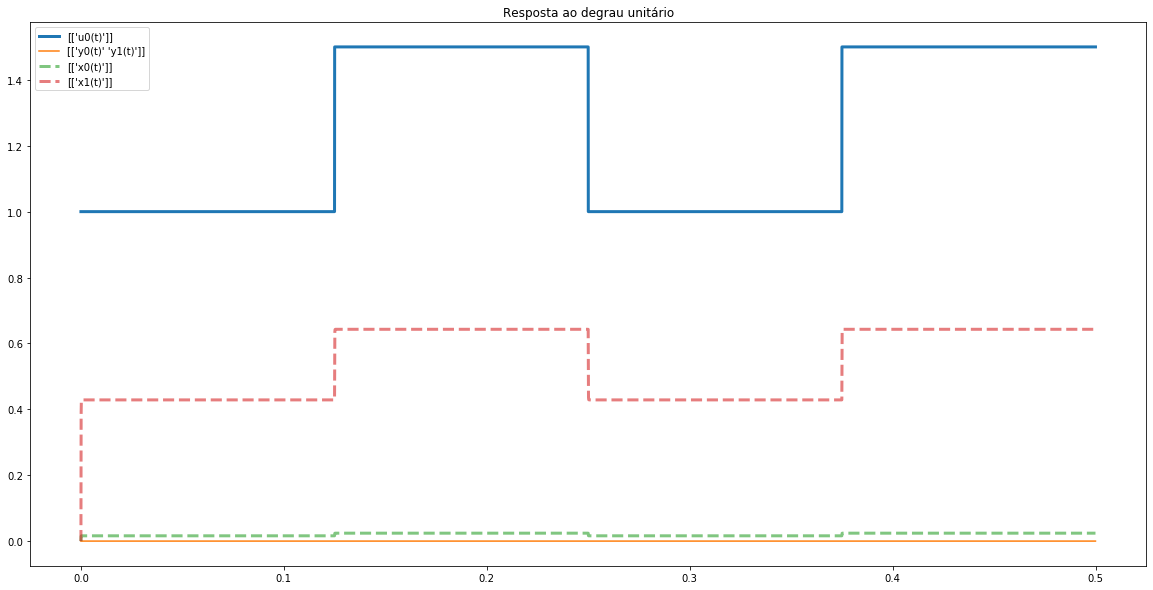

In [33]:
import matplotlib.pyplot as plt

# Identifica parâmetros do sistema
wn, zeta, poles = control.damp(sys)
fn = wn / (2 * np.pi)
f0 = min(fn)
print(f'f0 = {f0} Hz')

# Cria sinal arbitrário de entrada
Ts = 2e-5
pulse_time = 250e-3
pulse_cycles = 2
T = np.arange(pulse_time * pulse_cycles / Ts) * Ts
kmax = T.size
U = np.array([
    *[
        *np.ones(int(np.ceil(kmax / (2 * pulse_cycles)))),
        *np.ones(int(np.ceil(kmax / (2 * pulse_cycles)))) * 1.5
    ] * pulse_cycles
])
U = U[0:kmax]

# Simula o sistema aplicando o sinal arbitrário na entrada
T, yout, xout = control.forced_response(sys, T, U)

# Plota
plt.figure(figsize=(20, 10))
plt.plot(T, U, label=u_label[0], lw=3)
plt.plot(T, yout[0], label=y_label[0])
plt.plot(T, xout[0], label=x_label[0], lw=3, ls='--', alpha=0.6)
plt.plot(T, xout[1], label=x_label[1], lw=3, ls='--', alpha=0.6)
plt.title('Resposta ao degrau unitário')
plt.legend();
# plt.savefig('imgs/step_response_openloop.png', dpi=300)

## Função de transferência

In [ ]:
import control
import numpy as np



# Modelagem do Controlador